# Лабораторная работа №3

# 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [2]:
import pandas as pd
import numpy as np

In [3]:
ph_training = pd.read_csv('poker-hand-training-true.data.txt', header = None)
ph_training.columns = ['Suit of card #1', 'Rank of card #1',
                      'Suit of card #2', 'Rank of card #2',
                      'Suit of card #3', 'Rank of card #3',
                      'Suit of card #4', 'Rank of card #4',
                      'Suit of card #5', 'Rank of card #5', 'Hand']
ph_training

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5,Hand
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9
...,...,...,...,...,...,...,...,...,...,...,...
25005,3,9,2,6,4,11,4,12,2,4,0
25006,4,1,4,10,3,13,3,4,1,10,1
25007,2,1,2,10,4,4,4,1,4,13,1
25008,2,12,4,3,1,10,1,12,4,9,1


# 2. Удалите дубликаты строк в наборе данных, приведите размер набора данных до и после данной операции.

In [4]:
print('Original size: ', len(ph_training.index))
ph_training.drop_duplicates(inplace = True)
print('Final size: ', len(ph_training.index))

Original size:  25010
Final size:  25008


# 3. Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая).

In [5]:
import seaborn

<AxesSubplot:xlabel='Hand', ylabel='count'>

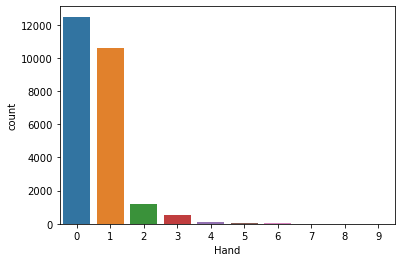

In [6]:
seaborn.countplot(x='Hand', data=ph_training)


# 4. Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию).

In [7]:
from sklearn import preprocessing
ph_training_normal = ph_training.drop('Hand', axis = 1)
ph_training_normal = preprocessing.normalize(ph_training_normal, axis=0, norm='max')
ph_training_normal = pd.DataFrame(ph_training_normal)
ph_training_normal.columns = ['Suit of card #1', 'Rank of card #1',
                      'Suit of card #2', 'Rank of card #2',
                      'Suit of card #3', 'Rank of card #3',
                      'Suit of card #4', 'Rank of card #4',
                      'Suit of card #5', 'Rank of card #5']
ph_training_normal

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5
0,0.25,0.769231,0.25,0.846154,0.25,1.000000,0.25,0.923077,0.25,0.076923
1,0.50,0.846154,0.50,1.000000,0.50,0.769231,0.50,0.923077,0.50,0.076923
2,0.75,0.923077,0.75,0.846154,0.75,1.000000,0.75,0.769231,0.75,0.076923
3,1.00,0.769231,1.00,0.846154,1.00,0.076923,1.00,1.000000,1.00,0.923077
4,1.00,0.076923,1.00,1.000000,1.00,0.923077,1.00,0.846154,1.00,0.769231
...,...,...,...,...,...,...,...,...,...,...
25003,0.75,0.692308,0.50,0.461538,1.00,0.846154,1.00,0.923077,0.50,0.307692
25004,1.00,0.076923,1.00,0.769231,0.75,1.000000,0.75,0.307692,0.25,0.769231
25005,0.50,0.076923,0.50,0.769231,1.00,0.307692,1.00,0.076923,1.00,1.000000
25006,0.50,0.923077,1.00,0.230769,0.25,0.769231,0.25,0.923077,1.00,0.692308


<AxesSubplot:>

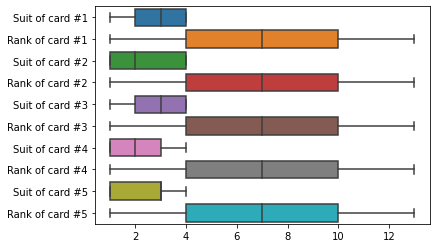

In [8]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.boxplot(data= ph_training.drop('Hand', axis = 1), orient = 'h')

<AxesSubplot:>

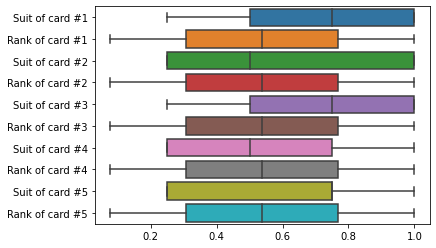

In [9]:
sns.boxplot(data=ph_training_normal, orient = 'h')

# 5. Выполните замену категориальных признаков; выберите и обоснуйте способ замены.

# 6. Оцените корреляцию между признаками и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации).

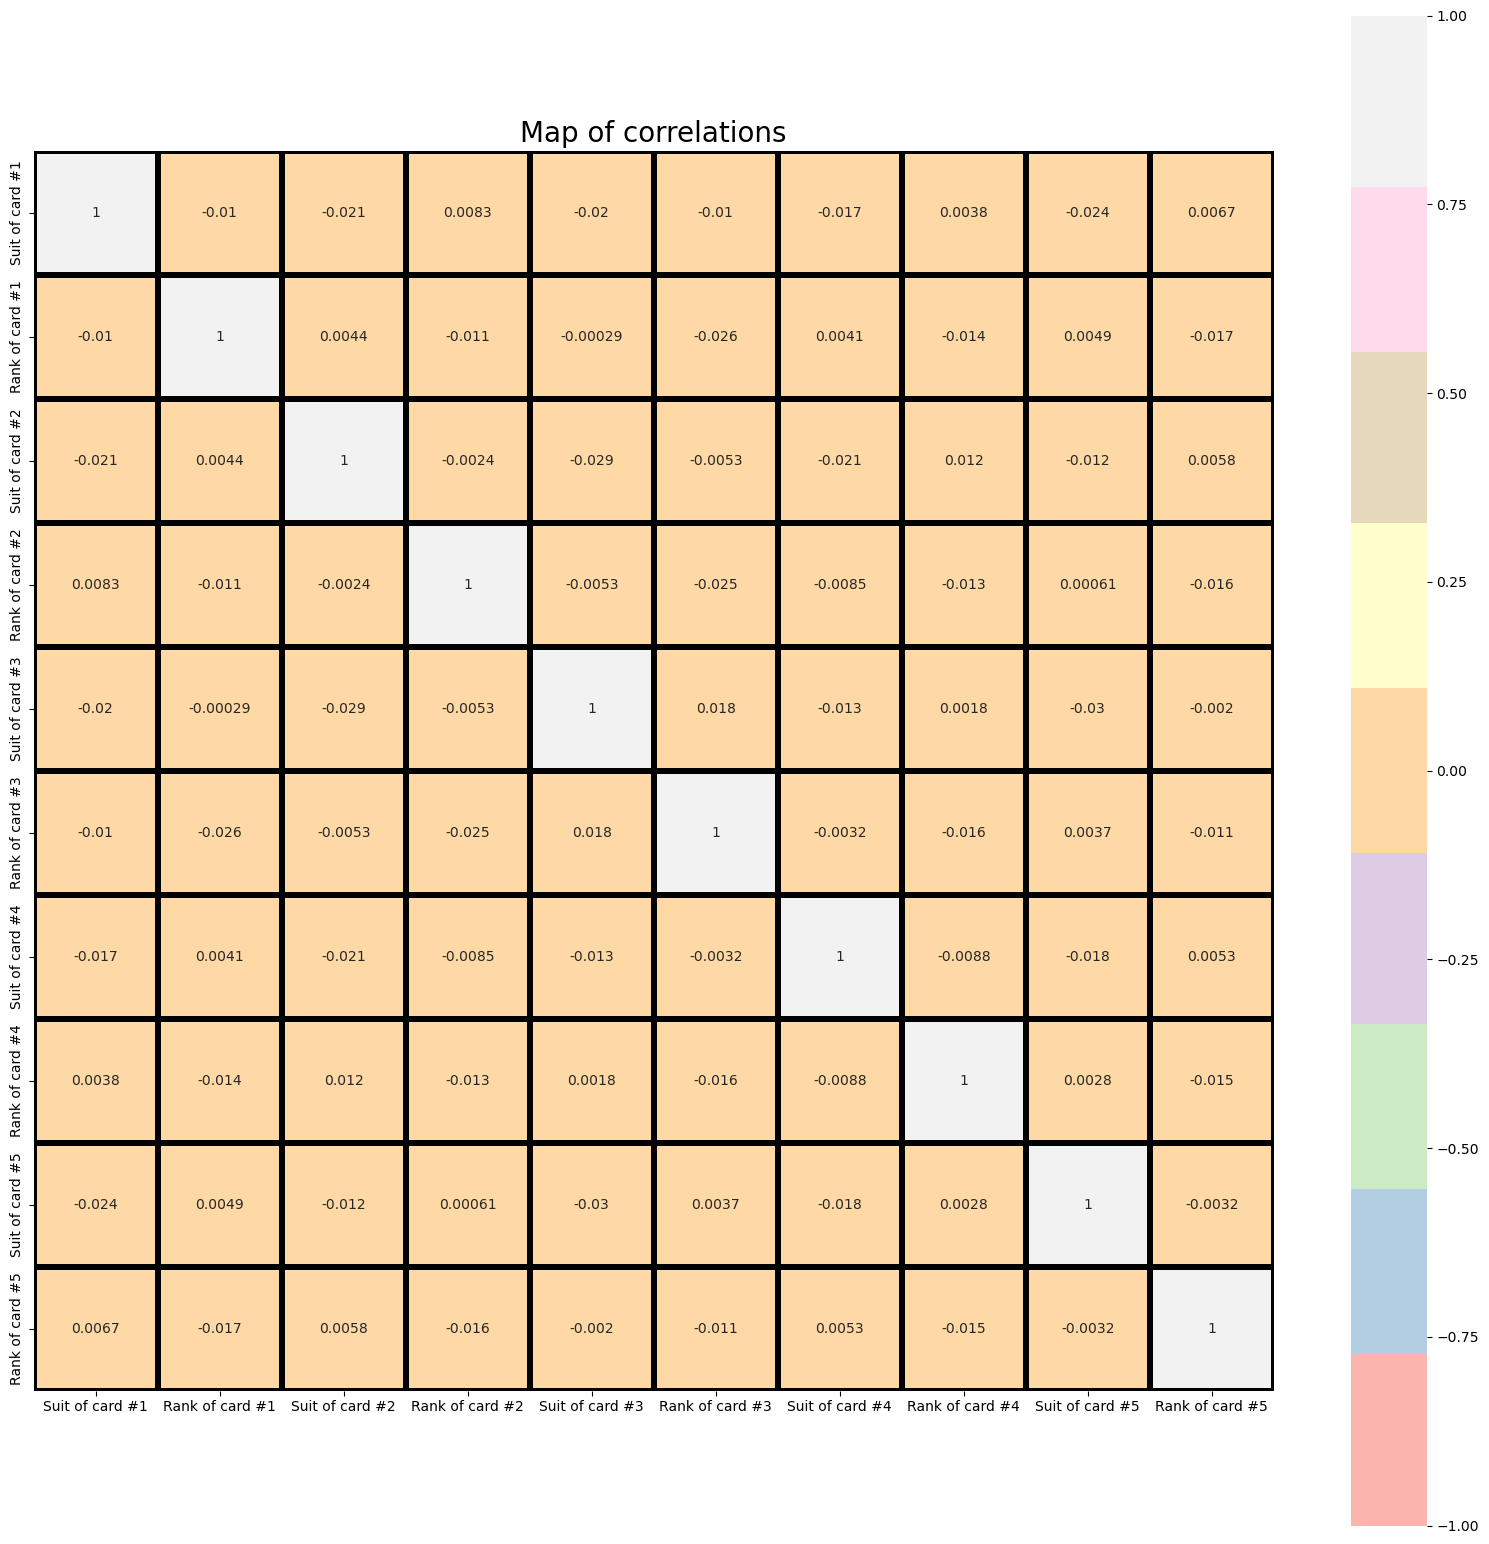

,Suit of card #1,Rank of card #1,Suit of card #2,Rank of card #2,Suit of card #3,Rank of card #3,Suit of card #4,Rank of card #4,Suit of card #5,Rank of card #5
Suit of card #1,1.000000,-0.010273,-0.021248,0.008290,-0.019683,-0.009980,-0.017255,0.003847,-0.024137,0.006715
Rank of card #1,-0.010273,1.000000,0.004413,-0.010951,-0.000288,-0.026273,0.004109,-0.014369,0.004854,-0.016983
Suit of card #2,-0.021248,0.004413,1.000000,-0.002424,-0.029276,-0.005299,-0.020945,0.012050,-0.011842,0.005777
Rank of card #2,0.008290,-0.010951,-0.002424,1.000000,-0.005347,-0.024678,-0.008471,-0.013004,0.000607,-0.016469
Suit of card #3,-0.019683,-0.000288,-0.029276,-0.005347,1.000000,0.017920,-0.013000,0.001849,-0.030291,-0.001971
Rank of card #3,-0.009980,-0.026273,-0.005299,-0.024678,0.017920,1.000000,-0.003168,-0.016310,0.003745,-0.010905
Suit of card #4,-0.017255,0.004109,-0.020945,-0.008471,-0.013000,-0.003168,1.000000,-0.008766,-0.018232,0.005265
Rank of card #4,0.003847,-0.014369,0.012050,-0.013004,0.001849,-0.016310,-0.008766,1.000000,0.002787,-0.014737
Suit of card #5,-0.024137,0.004854,-0.011842,0.000607,-0.030291,0.003745,-0.018232,0.002787,1.000000,-0.003200
Rank of card #5,0.006715,-0.016983,0.005777,-0.016469,-0.001971,-0.010905,0.005265,-0.014737,-0.003200,1.000000


In [10]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20), dpi= 100)
sns.heatmap(ph_training_normal.corr(), xticklabels=ph_training_normal.corr().columns, yticklabels=ph_training_normal.corr().columns, annot = True, vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black', square=True, cmap='Pastel1')
plt.title('Map of correlations', fontsize=20)
plt.show()

ph_training_normal.corr()

# 7. Заполните пропущенные значения в данных.

In [11]:
ph_training_normal.isnull().sum()

Suit of card #1    0
Rank of card #1    0
Suit of card #2    0
Rank of card #2    0
Suit of card #3    0
Rank of card #3    0
Suit of card #4    0
Rank of card #4    0
Suit of card #5    0
Rank of card #5    0
dtype: int64

# 8. Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации). Определите схему построения многоклассового классификатора, используемую по умолчанию (опишите используемую схему кодирования, обоснуйте свой выбор). Постройте, если это возможно, многоклассовую классификацию на основе схем «один-против-всех» и «все-против-всех». Оцените точность классификации для каждой их схем. Постройте кривые PR и ROC (для каждого из классов должны быть построены отдельные кривые, а также кривые для микро и макроусреднения метрик качества). Для линейного классификатора используйте регуляризацию. 

In [12]:
#Классификатор К ближайших соседей
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

x = ph_training_normal
y = ph_training['Hand']
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [14]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [16]:
predictions = knn.predict(x_test)
predictions

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [16]:
print("Accuracy: ", sk.metrics.accuracy_score(y_test, predictions))
print("Test labels: ", y_test)
print("Predicted labels: ", predictions)

Accuracy:  0.5204734484964811
Test labels:  6151     1
24440    0
9465     2
21548    0
9185     0
        ..
10235    1
8474     0
5881     0
3125     1
17917    2
Name: Hand, Length: 6252, dtype: int64
Predicted labels:  [1 0 0 ... 1 0 0]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

params = {'n_neighbors': [x for x in range(1, 50)]}
search = GridSearchCV(knn, params)
search.fit(x_train, y_train)

In [ ]:
from sklearn.model_selection import GridSearchCV
n = search.best_estimator_.n_neighbors
best = search.best_score_

knn = KNeighborsClassifier(n_neighbors=n)
knn.fit(x_train, y_train)
knn_predict = knn.predict(x_test)

In [ ]:
print("Значение точности:", accuracy_score(y_test, knn_predict))
print('Лучшая точность:', best)

In [17]:
#Классификатор Бинарное дерево
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

predictions = dtc.predict(x_test)

print("Accuracy: ", sk.metrics.accuracy_score(y_test, predictions))
print("Test labels: ", y_test)
print("Predicted labels: ", predictions)

Accuracy:  0.49056301983365325
Test labels:  6151     1
24440    0
9465     2
21548    0
9185     0
        ..
10235    1
8474     0
5881     0
3125     1
17917    2
Name: Hand, Length: 6252, dtype: int64
Predicted labels:  [0 0 0 ... 0 2 1]


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

params = {'max_depth': list(range(1,12)), 'max_features': list(range(1,12))}
dtc_grid = GridSearchCV(dtc, params)
dtc_grid.fit (x_train, y_train)

best_features = dtc_grid.best_estimator_.max_features 
best_depth = dtc_grid.best_estimator_.max_depth   
best_score = dtc_grid.best_estimator_.score
dtc = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
dtc.fit(x_train, y_train)

accuracy_score  = np.mean(y_test == dtc.predict(x_test))
print('Best: ', best_score)
print('Features: ', best_features)
print ('Depth:', best_depth)
print('Accuracy: ', accuracy_score)

Best:  <bound method ClassifierMixin.score of DecisionTreeClassifier(max_depth=9, max_features=5)>
Features:  5
Depth: 9
Accuracy:  0.5137555982085733


# 9. Сравните кривые для классификаторов, указанных в задании, сделайте выводы.

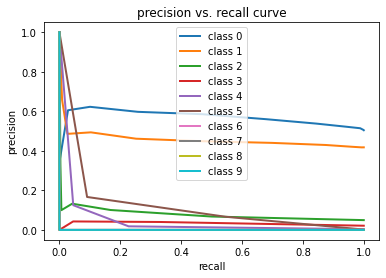

In [71]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.preprocessing import label_binarize

n_classes = len(set(y))

Y = label_binarize(y, classes=[*range(n_classes)])

x_train, x_test, y_train, y_test = train_test_split(x, Y, random_state = 0)

y_score = knn.predict_proba(x_test)

precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

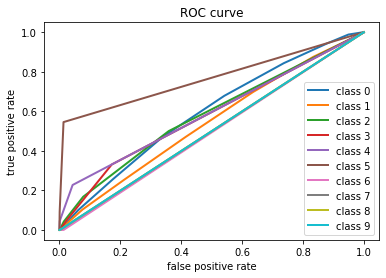

In [41]:
# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

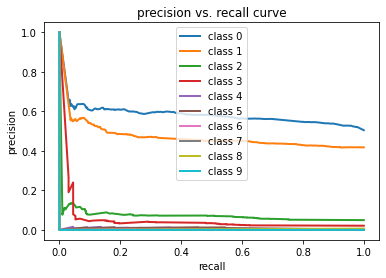

In [45]:
y_score = dtc.predict_proba(x_test)

# precision recall curve
precision = dict()
recall = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
    
plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

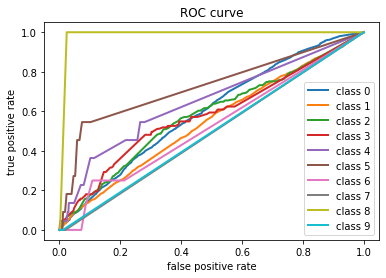

In [46]:
# roc curve
fpr = dict()
tpr = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()